HW8

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

1)

η = 2.89e-01

Cooling Results:
1 hour     -> Center Temperature: 498.66 °C
1 day      -> Center Temperature: 29.00 °C
1 week     -> Center Temperature: 20.00 °C
1 month    -> Center Temperature: 20.00 °C
1 year     -> Center Temperature: 20.00 °C


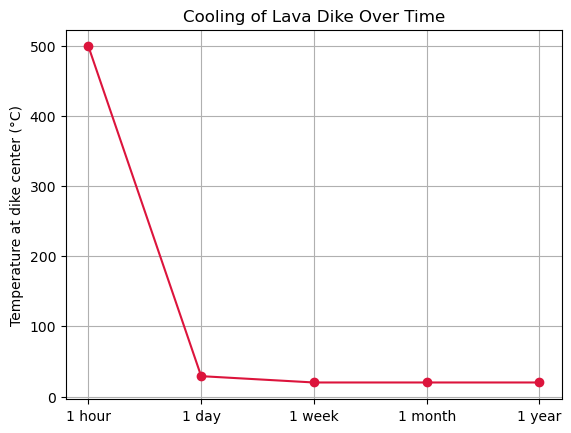

In [17]:
# Intitialize variables
kappa = 4.2
rho = 2550
cp = 1230
k = kappa / (rho * cp)
N_total = 50 * 5 + 1
x = np.linspace(0, 25, N_total)
T_rock = 20.0
T_dike = 1150

# Time interval
dt = 60
steps_per_hour = dt * 60
steps_per_day = steps_per_hour * 24
steps_per_week = steps_per_day * 7
steps_per_month = steps_per_day * 30
steps_per_year = steps_per_month * 12

T = np.full(N_total + 1, T_rock)
T[2 * 50:3 * 50 + 1] = T_dike
T[0] = T_rock
T[-1] = T_rock

eta = k * dt / dx**2
print(f"η = {eta:.2e}")

# --- Function for one update step ---
def update_1D(T, eta):
    Tnew = np.copy(T)
    for i in range(1, len(T) - 1):
        Tnew[i] = T[i] + eta * (T[i+1] - 2*T[i] + T[i-1])
    Tnew[0] = T_host
    Tnew[-1] = T_host
    return Tnew

def evolve(T, steps):
    for _ in range(steps):
        T = update_1D(T, eta)
    return T

times = {
    "1 hour": steps_per_hour,
    "1 day": steps_per_day,
    "1 week": steps_per_week,
    "1 month": steps_per_month,
    "1 year": steps_per_year
}

center_idx = len(T) // 2

results = {}
for label, steps in times.items():
    T_result = evolve(np.copy(T), steps)
    results[label] = T_result[center_idx]

print("\nCooling Results:")
for t, Tc in results.items():
    print(f"{t:<10} -> Center Temperature: {Tc:.2f} °C")

plt.plot(list(results.keys()), list(results.values()), '-o', color='crimson')
plt.ylabel("Temperature at dike center (°C)")
plt.title("Cooling of Lava Dike Over Time")
plt.grid(True)
plt.show()

2.

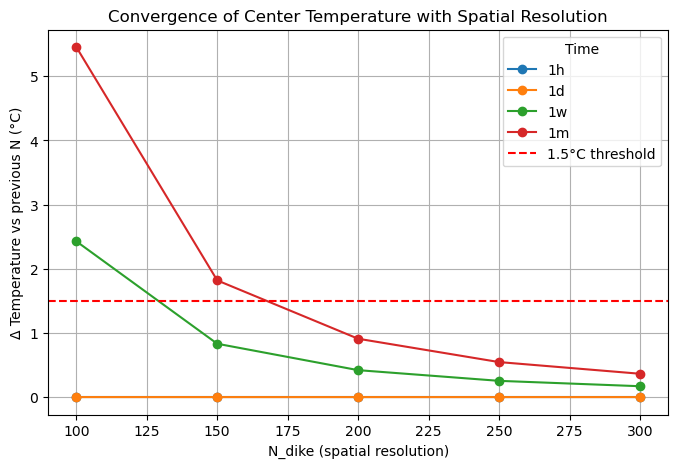

In [26]:
N_list = [50, 100, 150, 200, 250, 300]
results = {}
previous = None
diffs = {'1h': [], '1d': [], '1w': [], '1m': []}

for N_dike in N_list:
    dx = d / N_dike
    dt = eta_ref * dx**2 / k
    eta = k * dt / dx**2
    N_total = 5 * N_dike
    x = np.linspace(0, 5*d, N_total + 1)
    i_start, i_end = 2 * N_dike, 3 * N_dike
    T = np.full(N_total + 1, T_host)
    T[i_start:i_end + 1] = T_dike
    steps_dict = time_steps(dt)
    center_idx = len(T) // 2
    results_N = {}
    for label, steps in steps_dict.items():
        T_copy = evolve(np.copy(T), eta, steps, T_host)
        results_N[label] = T_copy[center_idx]
    results[N_dike] = results_N
    if previous is not None:
        for key in diffs.keys():
            diffs[key].append(abs(results_N[key] - previous[key]))
    previous = results_N

plt.figure(figsize=(8,5))
for key, values in diffs.items():
    plt.plot(N_list[1:], values, '-o', label=key)
plt.axhline(1.5, color='red', linestyle='--', linewidth=1.5, label='1.5°C threshold')
plt.xlabel('N_dike (spatial resolution)')
plt.ylabel('Δ Temperature vs previous N (°C)')
plt.title('Convergence of Center Temperature with Spatial Resolution')
plt.grid(True)
plt.legend(title='Time')
plt.show()


--- Center Temperature Results for N = 250 ---
1h     :  1150.00 °C
1d     :  1150.00 °C
1w     :  1095.10 °C
1m     :   764.94 °C
1y     :   250.07 °C


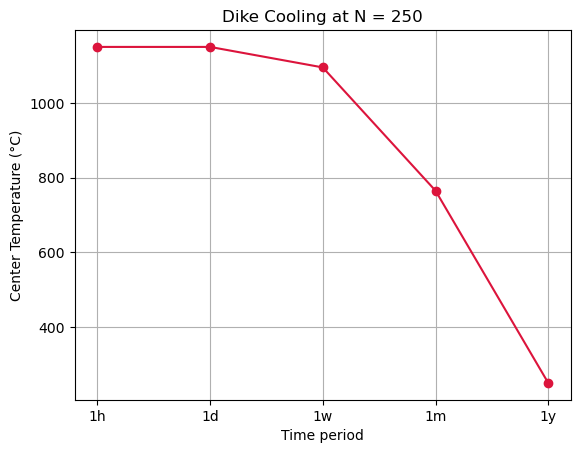

In [ ]:
N_dike = 250
dx = d / N_dike
dt = eta_ref * dx**2 / k   # keep η constant
eta = k * dt / dx**2

N_total = 5 * N_dike
x = np.linspace(0, 5*d, N_total + 1)
i_start, i_end = 2 * N_dike, 3 * N_dike

# Initial condition
T = np.full(N_total + 1, T_host)
T[i_start:i_end + 1] = T_dike

steps_dict = time_steps(dt)
center_idx = len(T) // 2

results_N = {}
for label, steps in steps_dict.items():
    T_copy = evolve(np.copy(T), eta, steps, T_host)
    results_N[label] = T_copy[center_idx]

print(f"\n--- Center Temperature Results for N = {N_dike} ---")
for t_label, Tc in results_N.items():
    print(f"{t_label:<6} : {Tc:8.2f} °C")

plt.plot(list(results_N.keys()), list(results_N.values()), '-o', color='crimson')
plt.xlabel("Time period")
plt.ylabel("Center Temperature (°C)")
plt.title(f"Dike Cooling at N = {N_dike}")
plt.grid(True)
plt.show()


3.

Center Temperature (°C) for each host width:

Width (×d)         1h         1d         1w         1m         1y
------------------------------------------------------------
2             1150.00    1150.00    1099.03     773.67     253.61
4             1150.00    1150.00    1099.03     773.67     267.00
6             1150.00    1150.00    1099.03     773.67     267.00
8             1150.00    1150.00    1099.03     773.67     267.00
10            1150.00    1150.00    1099.03     773.67     267.00
12            1150.00    1150.00    1099.03     773.67     267.00


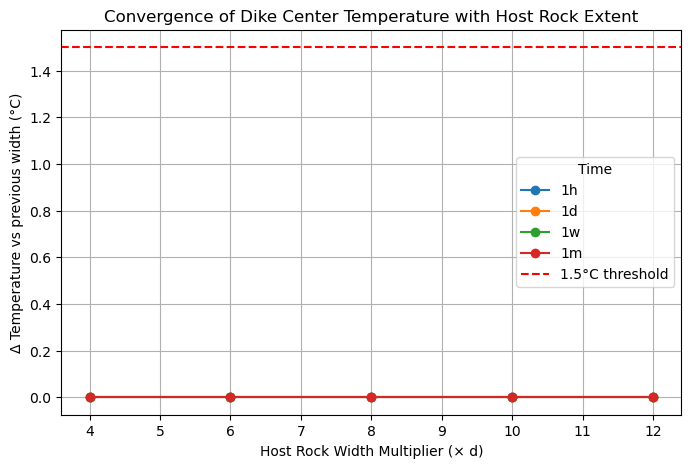


Converged at host rock width = 4 × d (ΔT < 1.5°C for all time spans)

Temperature at Dike Center for 4×d host width:
1h   :  1150.00 °C
1d   :  1150.00 °C
1w   :  1099.03 °C
1m   :   773.67 °C
1y   :   267.00 °C


In [25]:
host_multipliers = [2, 4, 6, 8, 10, 12]
results = {}
previous = None
diffs = {'1h': [], '1d': [], '1w': [], '1m': []}

for host_mult in host_multipliers:
    L = (2 * host_mult * d) + d
    N_total = int(L / dx)
    x = np.linspace(0, L, N_total + 1)
    i_start = host_mult * N_dike
    i_end = i_start + N_dike
    T = np.full(N_total + 1, T_host)
    T[i_start:i_end + 1] = T_dike
    steps_dict = time_steps(dt)
    center_idx = i_start + N_dike // 2
    results_width = {}
    for label, steps in steps_dict.items():
        T_copy = evolve(np.copy(T), eta, steps, T_host)
        results_width[label] = T_copy[center_idx]
    results[host_mult] = results_width
    if previous is not None:
        for key in diffs.keys():
            diffs[key].append(abs(results_width[key] - previous[key]))
    previous = results_width

print("Center Temperature (°C) for each host width:\n")
print(f"{'Width (×d)':<12} {'1h':>8} {'1d':>10} {'1w':>10} {'1m':>10} {'1y':>10}")
print("-" * 60)
for w, vals in results.items():
    print(f"{w:<12} {vals['1h']:8.2f} {vals['1d']:10.2f} {vals['1w']:10.2f} {vals['1m']:10.2f} {vals['1y']:10.2f}")

plt.figure(figsize=(8,5))
for key, values in diffs.items():
    plt.plot(host_multipliers[1:], values, '-o', label=key)
plt.axhline(1.5, color='red', linestyle='--', linewidth=1.5, label='1.5°C threshold')
plt.xlabel('Host Rock Width Multiplier (× d)')
plt.ylabel('Δ Temperature vs previous width (°C)')
plt.title('Convergence of Dike Center Temperature with Host Rock Extent')
plt.grid(True)
plt.legend(title='Time')
plt.show()

for i, width in enumerate(host_multipliers[1:], start=1):
    max_diff = max(v[i-1] for v in diffs.values())
    if max_diff < 1.5:
        print(f"\nConverged at host rock width = {width} × d (ΔT < 1.5°C for all time spans)")
        break
else:
    print("\nNo convergence within tested widths.")

if 4 in results:
    vals = results[4]
    print("\nTemperature at Dike Center for 4×d host width:")
    for label, temp in vals.items():
        print(f"{label:<4} : {temp:8.2f} °C")

η = 8.03e-03 (must be < 0.5 for stability)

Center Temperature (°C) for each host width:

Width (×d)         1h         1d         1w         1m         1y
------------------------------------------------------------
2             1150.00    1150.00    1099.03     773.67     253.61
4             1150.00    1150.00    1099.03     773.67     267.00
6             1150.00    1150.00    1099.03     773.67     267.00
8             1150.00    1150.00    1099.03     773.67     267.00
10            1150.00    1150.00    1099.03     773.67     267.00
12            1150.00    1150.00    1099.03     773.67     267.00


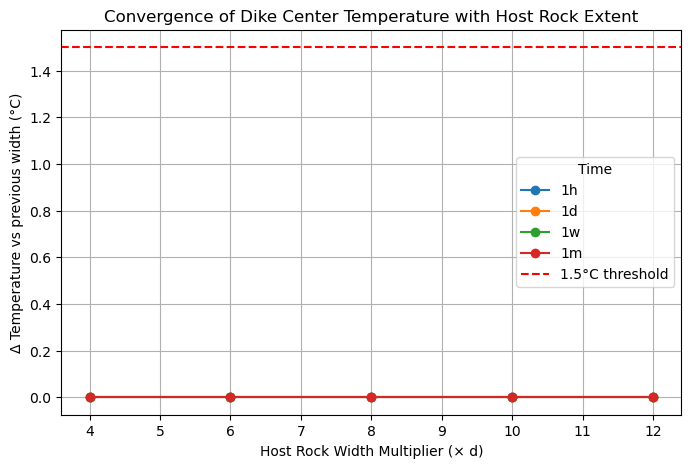


✅ Converged at host rock width = 4 × d (ΔT < 1.5°C for all time spans)

📊 Temperature at Dike Center for 4×d host width:
1h   :  1150.00 °C
1d   :  1150.00 °C
1w   :  1099.03 °C
1m   :   773.67 °C
1y   :   267.00 °C


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# --- Physical constants ---
kappa = 0.042 * 100      # J/(m·s·K)
rho = 2.55 * 1000        # kg/m³
cp = 1.23 * 1000         # J/(kg·K)
k = kappa / (rho * cp)   # thermal diffusivity [m²/s]

# --- Physical setup ---
d = 5.0                  # m (width of the dike)
T_host = 20.0
T_dike = 1150.0
N_dike = 50
dx = d / N_dike
dt = 60.0  # seconds
eta = k * dt / dx**2
print(f"η = {eta:.2e} (must be < 0.5 for stability)\n")

# --- Time durations ---
def time_steps(dt):
    hour  = int(3600 / dt)
    day   = int(86400 / dt)
    week  = int(7 * 86400 / dt)
    month = int(30 * 86400 / dt)
    year  = int(365 * 86400 / dt)
    return {'1h': hour, '1d': day, '1w': week, '1m': month, '1y': year}

def evolve(T, eta, steps, T_host):
    for _ in range(steps):
        T[1:-1] += eta * (T[2:] - 2*T[1:-1] + T[:-2])
        T[0] = T_host
        T[-1] = T_host
    return T

# --- Host rock widths (2d, 4d, 6d, 8d, 10d, 12d)
host_multipliers = [2, 4, 6, 8, 10, 12]
results = {}
previous = None
diffs = {'1h': [], '1d': [], '1w': [], '1m': []}

for host_mult in host_multipliers:
    L = (2 * host_mult * d) + d     # total domain
    N_total = int(L / dx)
    x = np.linspace(0, L, N_total + 1)

    i_start = host_mult * N_dike
    i_end = i_start + N_dike

    # Initial profile
    T = np.full(N_total + 1, T_host)
    T[i_start:i_end + 1] = T_dike

    steps_dict = time_steps(dt)
    center_idx = i_start + N_dike // 2
    results_width = {}

    for label, steps in steps_dict.items():
        T_copy = evolve(np.copy(T), eta, steps, T_host)
        results_width[label] = T_copy[center_idx]

    results[host_mult] = results_width

    # Compare to previous for convergence
    if previous is not None:
        for key in diffs.keys():
            diffs[key].append(abs(results_width[key] - previous[key]))
    previous = results_width

# --- Print all results ---
print("Center Temperature (°C) for each host width:\n")
print(f"{'Width (×d)':<12} {'1h':>8} {'1d':>10} {'1w':>10} {'1m':>10} {'1y':>10}")
print("-" * 60)
for w, vals in results.items():
    print(f"{w:<12} {vals['1h']:8.2f} {vals['1d']:10.2f} {vals['1w']:10.2f} {vals['1m']:10.2f} {vals['1y']:10.2f}")

# --- Plot convergence curve ---
plt.figure(figsize=(8,5))
for key, values in diffs.items():
    plt.plot(host_multipliers[1:], values, '-o', label=key)

plt.axhline(1.5, color='red', linestyle='--', linewidth=1.5, label='1.5°C threshold')
plt.xlabel('Host Rock Width Multiplier (× d)')
plt.ylabel('Δ Temperature vs previous width (°C)')
plt.title('Convergence of Dike Center Temperature with Host Rock Extent')
plt.grid(True)
plt.legend(title='Time')
plt.show()

# --- Check for convergence ---
for i, width in enumerate(host_multipliers[1:], start=1):
    max_diff = max(v[i-1] for v in diffs.values())
    if max_diff < 1.5:
        print(f"\n✅ Converged at host rock width = {width} × d (ΔT < 1.5°C for all time spans)")
        break
else:
    print("\n❌ No convergence within tested widths.")

# --- Print specifically the 4d case ---
if 4 in results:
    vals = results[4]
    print("\n📊 Temperature at Dike Center for 4×d host width:")
    for label, temp in vals.items():
        print(f"{label:<4} : {temp:8.2f} °C")


4.

/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_3385/3215602024.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(slice_, dx=dx)



Heat Lost from Dike vs Time (center temp and % lost), by host-rock width
(host width = multiplier × d on EACH side; d = 5 m)
Host×d |     1h (Tc, %lost) |     1d (Tc, %lost) |     1w (Tc, %lost) |     1m (Tc, %lost) |     1y (Tc, %lost)
---------------------------------------------------------------------------------------------------------------
      2   1150.0,   0.79   1150.0,   6.72   1099.0,  19.32    773.7,  39.93    253.6,  79.68
      4   1150.0,   0.79   1150.0,   6.72   1099.0,  19.32    773.7,  39.93    267.0,  78.40
      6   1150.0,   0.79   1150.0,   6.72   1099.0,  19.32    773.7,  39.93    267.0,  78.40
      8   1150.0,   0.79   1150.0,   6.72   1099.0,  19.32    773.7,  39.93    267.0,  78.40
     10   1150.0,   0.79   1150.0,   6.72   1099.0,  19.32    773.7,  39.93    267.0,  78.40
     12   1150.0,   0.79   1150.0,   6.72   1099.0,  19.32    773.7,  39.93    267.0,  78.40


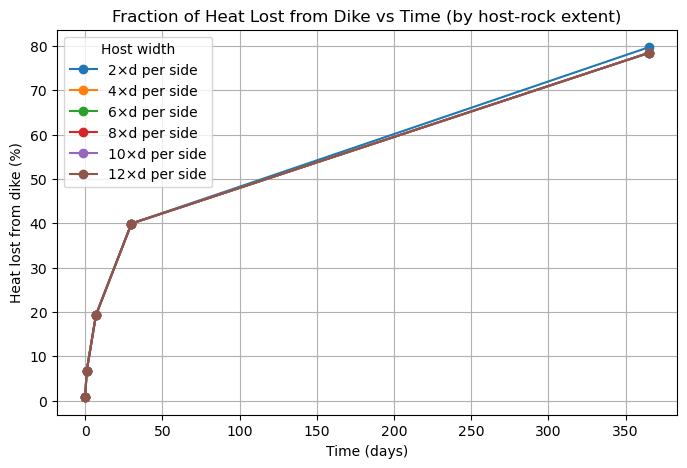

In [24]:
host_multipliers = [2, 4, 6, 8, 10, 12]
times = time_steps(dt)
results = {}

for host_mult in host_multipliers:
    L = (2 * host_mult * d) + d
    N_total = int(round(L / dx))
    x = np.linspace(0, L, N_total + 1)
    i_start = host_mult * N_dike
    i_end = i_start + N_dike
    center_idx = i_start + N_dike // 2
    T0 = np.full(N_total + 1, T_host)
    T0[i_start:i_end + 1] = T_dike
    E0 = dike_energy(T0, i_start, i_end, dx, subtract_host=True)
    res = {}
    for label, nsteps in times.items():
        Tt = evolve(np.copy(T0), eta, nsteps, T_host)
        Et = dike_energy(Tt, i_start, i_end, dx, subtract_host=True)
        frac_lost = 1.0 - (Et / E0 if E0 != 0 else 0.0)
        res[label] = (Tt[center_idx], 100.0 * frac_lost)
    results[host_mult] = res

labels = ["1h","1d","1w","1m","1y"]
print("\nHeat Lost from Dike vs Time (center temp and % lost), by host-rock width")
print("(host width = multiplier × d on EACH side; d = 5 m)")
hdr = "Host×d | " + " | ".join([f"{lab:>6s} (Tc, %lost)" for lab in labels])
print(hdr)
print("-"*len(hdr))
for host_mult in host_multipliers:
    row = [f"{host_mult:>7d}"]
    for lab in labels:
        Tc, pct = results[host_mult][lab]
        row.append(f"{Tc:6.1f}, {pct:6.2f}")
    print("   ".join(row))

plt.figure(figsize=(8,5))
time_days = {"1h": 1/24, "1d": 1, "1w": 7, "1m": 30, "1y": 365}
for host_mult in host_multipliers:
    y = [results[host_mult][lab][1] for lab in labels]
    xdays = [time_days[lab] for lab in labels]
    plt.plot(xdays, y, "-o", label=f"{host_mult}×d per side")
plt.xlabel("Time (days)")
plt.ylabel("Heat lost from dike (%)")
plt.title("Fraction of Heat Lost from Dike vs Time (by host-rock extent)")
plt.grid(True)
plt.legend(title="Host width")
plt.show()